# L05-1-Tidy
## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here.


# Tidy Data
Source data is often organized in many different ways. If you could 'standardize' on a canonical way of organizing the data that works well for analysis and for the tidyverse tools, that would make you a more agile analyst. When Hadley Wickham created the tidyverse, he based it on some data organization principles that are consistent with database and data warehouse principles.

## Tidy data principles
The tidy data principles are:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each observational unit forms a table.

## R Features
* library()
* read_csv()
* glimpse()
* head()
* gather()
* mutate()
* parse_number()
* as.integer()
* everything()
* make_date()
* spread()
* separate()
* ggplot()
* aes()
* geom_point()
* geom_line()

## Datasets
* weather.csv


In [1]:
# Load libraries
library("stringr")    # stringr
library("lubridate")  # lubridate
library("tidyverse")  # tidyverse



Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ readr   1.1.1
✔ tibble  2.1.3     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ dplyr   0.8.3
✔ ggplot2 3.2.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


## tidyr package
* complete                Complete a data frame with missing combinations of data.
* drop_na                 Drop rows containing missing values
* expand                  Expand data frame to include all combinations of values
* extract                 Extract one column into multiple columns.
* extract_numeric         Extract numeric component of variable.
* fill                    Fill in missing values.
* full_seq                Create the full sequence of values in a vector.
* gather                  Gather columns into key-value pairs.
* nest                    Nest repeated values in a list-variable.
* replace_na              Replace missing values
* separate                Separate one column into multiple columns.
* separate_rows           Separate a collapsed column into multiple rows.
* separate\_rows_          Standard-evaluation version of 'separate_rows'.
* smiths                  Some data about the Smith family.
* spread                  Spread a key-value pair across multiple columns.
* table1                  Example tabular representations
* unite                   Unite multiple columns into one.
* unnest                  Unnest a list column.
* who                     World Health Organization TB data


In [3]:
# Use library(help = "package")
# to see the functions
library(help = "tidyr")


## read_csv()
Read a delimited file into a data frame. read_csv and read_tsv are special cases of the general read_delim. They're useful for reading the most common types of flat file data, comma separated values and tab separated values, respectively. read_csv2 uses ; for separators, instead of ,. This is common in European countries which use , as the decimal separator. 
### Usage
read_csv(file, col_names = TRUE, col_types = NULL,
  locale = default_locale(), na = c("", "NA"), quoted_na = TRUE,
  comment = "", trim_ws = TRUE, skip = 0, n_max = Inf,
  guess_max = min(1000, n_max), progress = interactive())

In [4]:
# View help on read_csv()
?read_csv()


In [5]:
# Import sample data
# file: weather.csv 
# Store in df
# Hint: read_csv()
df <- "weather.csv" %>% read_csv()

# glimpse result
df %>% glimpse()

# display result
df


Parsed with column specification:
cols(
  id = col_character(),
  year = col_integer(),
  month = col_integer(),
  element = col_character(),
  d1 = col_integer(),
  d2 = col_integer(),
  d3 = col_integer(),
  d4 = col_integer(),
  d5 = col_integer(),
  d6 = col_integer(),
  d7 = col_integer(),
  d8 = col_integer(),
  d9 = col_integer(),
  d10 = col_integer()
)


Observations: 6
Variables: 14
$ id      <chr> "seattle_wa", "seattle_wa", "seattle_wa", "seattle_wa", "seat…
$ year    <int> 2016, 2016, 2016, 2016, 2016, 2016
$ month   <int> 10, 10, 10, 11, 11, 11
$ element <chr> "tmax", "tavg", "tmin", "tmax", "tavg", "tmin"
$ d1      <int> 63, 56, 50, 57, 54, 50
$ d2      <int> 64, 57, 50, 57, 54, 51
$ d3      <int> 61, 56, 51, 64, 56, 46
$ d4      <int> 63, 57, 53, 64, 53, 42
$ d5      <int> 66, 58, 53, 57, 55, 52
$ d6      <int> 63, 59, 55, 61, 54, 48
$ d7      <int> 64, 59, 55, 62, 57, 52
$ d8      <int> 68, 60, 53, 71, 60, 48
$ d9      <int> 57, 54, 50, 64, 58, 53
$ d10     <int> 60, 53, 46, 63, 56, 48


id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10
<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
seattle_wa,2016,10,tmax,63,64,61,63,66,63,64,68,57,60
seattle_wa,2016,10,tavg,56,57,56,57,58,59,59,60,54,53
seattle_wa,2016,10,tmin,50,50,51,53,53,55,55,53,50,46
seattle_wa,2016,11,tmax,57,57,64,64,57,61,62,71,64,63
seattle_wa,2016,11,tavg,54,54,56,53,55,54,57,60,58,56
seattle_wa,2016,11,tmin,50,51,46,42,52,48,52,48,53,48


Notice columns d1 - d10 represent the first day of the month to the tenth day of the month

Next: Given the grain of this table is daily, there should be one row per day. Currently there are 3 rows per month.

## Gather()
Gather columns into key-value pairs.
### Usage
gather(data, key, value, ..., na.rm = FALSE, convert = FALSE,
  factor_key = FALSE)

In [7]:
# View help on gather()
?gather()


In [21]:
# Turn the columns d1 - d10 into two columns
# day column to represent the day
# value column to represent the value at that day
# Hint: gather() key = day, value = value
# Hint: columns can be selected using col1:coln
df2 <- df%>% 
   gather(5:14, key = day, value = value )

# glimpse result
df2 %>% glimpse()

# display result, first 12 rows
# Hint: head()
df2 %>% head(12)


Observations: 60
Variables: 6
$ id      <chr> "seattle_wa", "seattle_wa", "seattle_wa", "seattle_wa", "seat…
$ year    <int> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2…
$ month   <int> 10, 10, 10, 11, 11, 11, 10, 10, 10, 11, 11, 11, 10, 10, 10, 1…
$ element <chr> "tmax", "tavg", "tmin", "tmax", "tavg", "tmin", "tmax", "tavg…
$ day     <chr> "d1", "d1", "d1", "d1", "d1", "d1", "d2", "d2", "d2", "d2", "…
$ value   <int> 63, 56, 50, 57, 54, 50, 64, 57, 50, 57, 54, 51, 61, 56, 51, 6…


id,year,month,element,day,value
<chr>,<int>,<int>,<chr>,<chr>,<int>
seattle_wa,2016,10,tmax,d1,63
seattle_wa,2016,10,tavg,d1,56
seattle_wa,2016,10,tmin,d1,50
seattle_wa,2016,11,tmax,d1,57
seattle_wa,2016,11,tavg,d1,54
seattle_wa,2016,11,tmin,d1,50
seattle_wa,2016,10,tmax,d2,64
seattle_wa,2016,10,tavg,d2,57
seattle_wa,2016,10,tmin,d2,50


Notice there are two columns, day and value and there are more rows than before.

Next: Convert day values from character to integers

## parse_number()
Extract numbers out of an atomic vector. This drops any non-numeric characters before or after the first number. The grouping mark specified by the locale is ignored inside the number. 

### Usage
parse_number(x, na = c("", "NA"), locale = default_locale())

In [22]:
# View help on parse_number()
?parse_number()


In [24]:
# Convert day column to integer
# reorder columns so day is just to the right of month
# store in df3
# Hint: Use, parse_number() and as.integer()
df3 <- df2 %>% mutate(day = parse_number(day) %>% as.integer()) %>% 
   select(id, year, month, day, element, value)

# glimpse result
df3 %>% glimpse()

# display result, first 12 rows
# Hint: head()
df3 %>% head(12)


Observations: 60
Variables: 6
$ id      <chr> "seattle_wa", "seattle_wa", "seattle_wa", "seattle_wa", "seat…
$ year    <int> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2…
$ month   <int> 10, 10, 10, 11, 11, 11, 10, 10, 10, 11, 11, 11, 10, 10, 10, 1…
$ day     <int> 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4…
$ element <chr> "tmax", "tavg", "tmin", "tmax", "tavg", "tmin", "tmax", "tavg…
$ value   <int> 63, 56, 50, 57, 54, 50, 64, 57, 50, 57, 54, 51, 61, 56, 51, 6…


id,year,month,day,element,value
<chr>,<int>,<int>,<int>,<chr>,<int>
seattle_wa,2016,10,1,tmax,63
seattle_wa,2016,10,1,tavg,56
seattle_wa,2016,10,1,tmin,50
seattle_wa,2016,11,1,tmax,57
seattle_wa,2016,11,1,tavg,54
seattle_wa,2016,11,1,tmin,50
seattle_wa,2016,10,2,tmax,64
seattle_wa,2016,10,2,tavg,57
seattle_wa,2016,10,2,tmin,50


Notice year, month, and day columns are all integers and next to each other. 

Next: Combine year, month, and day to a single date field

## make_date()
Efficient creation of date-times from numeric representations. make_datetime is a very fast drop-in replacement for base::ISOdate and base::ISOdatetime. make_date produces objects of class Date. 
#### Usage
make_date(year = 1970L, month = 1L, day = 1L)

In [25]:
# View help on make_date()
?make_date()


In [26]:
# Combine year, month, and day into 
# a single column, date with datatype date
# Order columns so date is to the right of id
# Remove year, month, and day columns
# Store result in df4
# Hint: make_date()
df4 <- df3 %>% mutate(date = make_date(year, month, day)) %>% 
   select(id, date, element, value)

# glimpse result
df4 %>% glimpse()

# display result, first 12 rows
df4 %>% head(12)


Observations: 60
Variables: 4
$ id      <chr> "seattle_wa", "seattle_wa", "seattle_wa", "seattle_wa", "seat…
$ date    <date> 2016-10-01, 2016-10-01, 2016-10-01, 2016-11-01, 2016-11-01, …
$ element <chr> "tmax", "tavg", "tmin", "tmax", "tavg", "tmin", "tmax", "tavg…
$ value   <int> 63, 56, 50, 57, 54, 50, 64, 57, 50, 57, 54, 51, 61, 56, 51, 6…


id,date,element,value
<chr>,<date>,<chr>,<int>
seattle_wa,2016-10-01,tmax,63
seattle_wa,2016-10-01,tavg,56
seattle_wa,2016-10-01,tmin,50
seattle_wa,2016-11-01,tmax,57
seattle_wa,2016-11-01,tavg,54
seattle_wa,2016-11-01,tmin,50
seattle_wa,2016-10-02,tmax,64
seattle_wa,2016-10-02,tavg,57
seattle_wa,2016-10-02,tmin,50


Notice there is a single date column representing the date. 

There are still three rows per date. We want one row per date. 

Next: Change the element measurements from a single row to multiple columns

## spread()
Spread a key-value pair across multiple columns.
### Usage
spread(data, key, value, fill = NA, convert = FALSE, drop = TRUE, sep = NULL)

In [28]:
# View help on spread()
?spread()


In [30]:
# Change the element column to a column for every
# unique value of this column
# Move the associated value in the value column 
# to the newly created column
# Column order should be tmax, tavg, tmin
# store the result in df5
# Hint: element and value columns are replaced by tmax, tavg, tmin
# Hint: spread() key = element
df5 <- df4 %>% spread(key = element, value = value) %>% 
   select(id, date, tmax, tavg, tmin)

# glimpse result
df5 %>% glimpse()

# display result, top 12 rows
df5 %>% head(12)


Observations: 20
Variables: 5
$ id   <chr> "seattle_wa", "seattle_wa", "seattle_wa", "seattle_wa", "seattle…
$ date <date> 2016-10-01, 2016-10-02, 2016-10-03, 2016-10-04, 2016-10-05, 201…
$ tmax <int> 63, 64, 61, 63, 66, 63, 64, 68, 57, 60, 57, 57, 64, 64, 57, 61, …
$ tavg <int> 56, 57, 56, 57, 58, 59, 59, 60, 54, 53, 54, 54, 56, 53, 55, 54, …
$ tmin <int> 50, 50, 51, 53, 53, 55, 55, 53, 50, 46, 50, 51, 46, 42, 52, 48, …


id,date,tmax,tavg,tmin
<chr>,<date>,<int>,<int>,<int>
seattle_wa,2016-10-01,63,56,50
seattle_wa,2016-10-02,64,57,50
seattle_wa,2016-10-03,61,56,51
seattle_wa,2016-10-04,63,57,53
seattle_wa,2016-10-05,66,58,53
seattle_wa,2016-10-06,63,59,55
seattle_wa,2016-10-07,64,59,55
seattle_wa,2016-10-08,68,60,53
seattle_wa,2016-10-09,57,54,50


Notice there is one row per day and three variables tmax, tavg, and tmin. 

Next: The id combines both city and state. Split these out into two columns.

## separate()
Separate one column into multiple columns. Given either regular expression or a vector of character positions, separate() turns a single character column into multiple columns.
### Usage
separate(data, col, into, sep = "[^[:alnum:]]+", remove = TRUE, convert = FALSE, extra = "warn", fill = "warn", ...)

In [32]:
# View help on separate()
df <- data.frame(x = c(NA, "a.b", "a.d", "b.c"))
df %>% separate(x, c("A", "B"))

# If every row doesn't split into the same number of pieces, use
# the extra and fill arguments to control what happens
df <- data.frame(x = c("a", "a b", "a b c", NA))
df %>% separate(x, c("a", "b"))
# The same behaviour but no warnings
df %>% separate(x, c("a", "b"), extra = "drop", fill = "right")
# Another option:
df %>% separate(x, c("a", "b"), extra = "merge", fill = "left")

# If only want to split specified number of times use extra = "merge"
df <- data.frame(x = c("x: 123", "y: error: 7"))
df %>% separate(x, c("key", "value"), ": ", extra = "merge")


A,B
<chr>,<chr>
NA,NA
a,b
a,d
b,c


Warning message:
“Expected 2 pieces. Additional pieces discarded in 1 rows [3].”Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1 rows [1].”

a,b
<chr>,<chr>
a,NA
a,b
a,b
NA,NA


a,b
<chr>,<chr>
a,NA
a,b
a,b
NA,NA


a,b
<chr>,<chr>
NA,a
a,b
a,b c
NA,NA


key,value
<chr>,<chr>
x,123
y,error: 7


In [37]:
# Split id into city and state columns
# city and state columns should be ordered first
# Store result in df6
# remove id column
# Hint: separate() col = id
df6 <- df5 %>% separate(id, c('city', 'state')) %>%
   select(state, city, date, tmax, tavg, tmin)

# glimpse result
df6 %>% glimpse()

# display result, first 6 rows
df6 %>% head()


Observations: 20
Variables: 6
$ state <chr> "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa…
$ city  <chr> "seattle", "seattle", "seattle", "seattle", "seattle", "seattle…
$ date  <date> 2016-10-01, 2016-10-02, 2016-10-03, 2016-10-04, 2016-10-05, 20…
$ tmax  <int> 63, 64, 61, 63, 66, 63, 64, 68, 57, 60, 57, 57, 64, 64, 57, 61,…
$ tavg  <int> 56, 57, 56, 57, 58, 59, 59, 60, 54, 53, 54, 54, 56, 53, 55, 54,…
$ tmin  <int> 50, 50, 51, 53, 53, 55, 55, 53, 50, 46, 50, 51, 46, 42, 52, 48,…


state,city,date,tmax,tavg,tmin
<chr>,<chr>,<date>,<int>,<int>,<int>
wa,seattle,2016-10-01,63,56,50
wa,seattle,2016-10-02,64,57,50
wa,seattle,2016-10-03,61,56,51
wa,seattle,2016-10-04,63,57,53
wa,seattle,2016-10-05,66,58,53
wa,seattle,2016-10-06,63,59,55


Notice the data now adheres to the tidy data principles:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each observational unit forms a table.

If this were in a data warehouse using star schema, then this table would be considered a fact table since it contains the observations, tmax, tavg, and tmin. state, city, and date would be moved to dimension tables and referenced with surrogate key ID values.

Next: Plot result

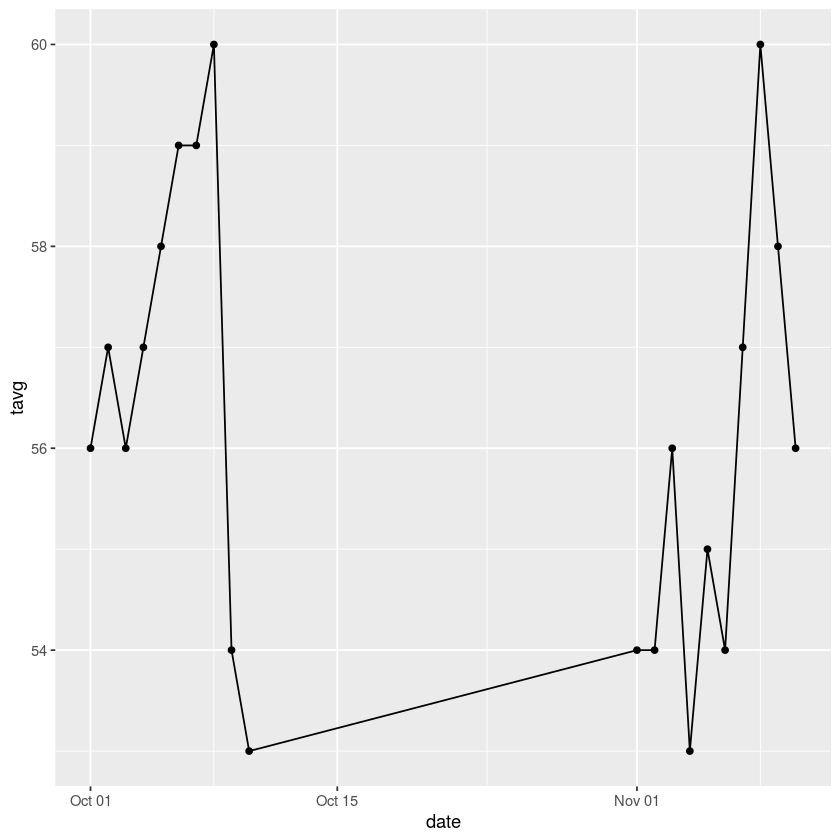

In [39]:
# Create a point and line plot
# x-axis is date, y axis is tavg
# data: df6
df5 %>% ggplot(aes(date, tavg)) + 
   geom_point() + 
   geom_line()


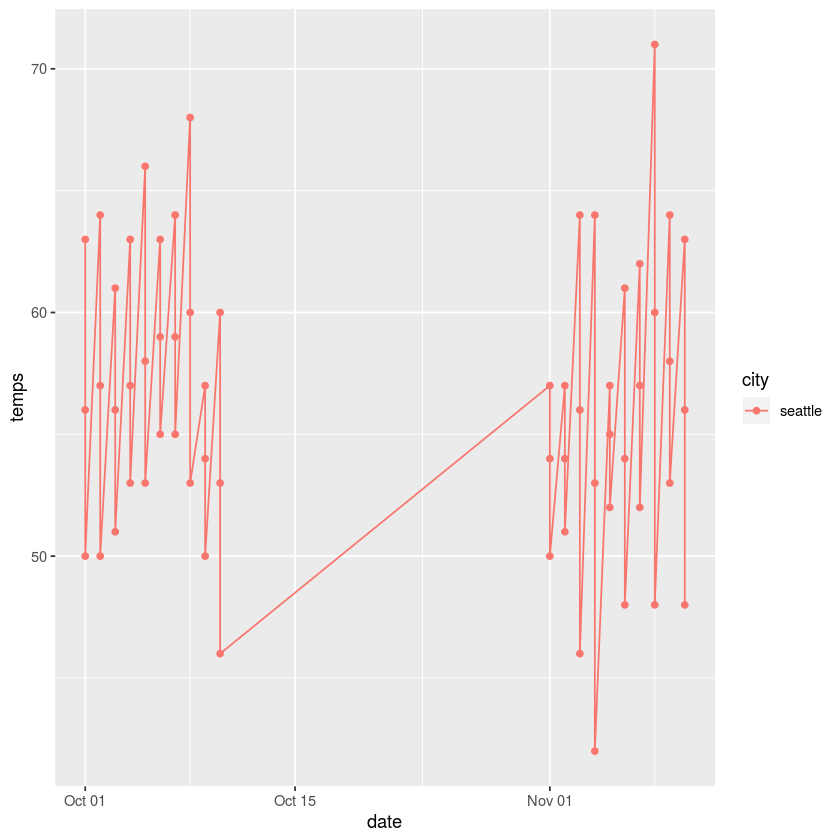

In [41]:
# Plot all tmax, tavg, and tmin as y axis
# x axis is date
# data: df6
# point and line geometries plus color
# Hint: use gather() key = element
df6 %>% 
   gather(4:6, key = element, value = temps) %>% 
   ggplot(aes(x = date, y = temps, color = city)) +
      geom_point() +
      geom_line()


Notice the peak max temperature. 

## Code Recap

In [46]:
# Load libraries
library("stringr")    # stringr
library("lubridate")  # lubridate
library("tidyverse")  # tidyverse


# Import sample data
# file: weather.csv 
# Store in df
# Hint: read_csv()
df <- read_csv("weather.csv")

# Turn the columns d1 - d10 into two columns
# day column to represent the day
# value column to represent the value at that day
# Hint: gather() key = day, value = value
# Hint: columns can be selected using col1:coln
df2 <- df %>% 
   gather(5:14, key = day, value = value)

Parsed with column specification:
cols(
  id = col_character(),
  year = col_integer(),
  month = col_integer(),
  element = col_character(),
  d1 = col_integer(),
  d2 = col_integer(),
  d3 = col_integer(),
  d4 = col_integer(),
  d5 = col_integer(),
  d6 = col_integer(),
  d7 = col_integer(),
  d8 = col_integer(),
  d9 = col_integer(),
  d10 = col_integer()
)


In [47]:
# Convert day column to integer
# reorder columns so day is just to the right of month
# store in df3
# Hint: Use, parse_number() and as.integer()
df3 <- df2 %>% mutate(day = parse_number(day) %>% as.integer()) %>% 
   select(id, year, month, day, element, value)

In [49]:
# Combine year, month, and day into 
# a single column, date with datatype date
# Order columns so date is to the right of id
# Remove year, month, and day columns
# Store result in df4
# Hint: make_date()
df4 <- df3 %>% mutate(date = make_date(year, month, day)) %>% 
   select(id, date, element,value)

df4 %>% glimpse()

Observations: 60
Variables: 4
$ id      <chr> "seattle_wa", "seattle_wa", "seattle_wa", "seattle_wa", "seat…
$ date    <date> 2016-10-01, 2016-10-01, 2016-10-01, 2016-11-01, 2016-11-01, …
$ element <chr> "tmax", "tavg", "tmin", "tmax", "tavg", "tmin", "tmax", "tavg…
$ value   <int> 63, 56, 50, 57, 54, 50, 64, 57, 50, 57, 54, 51, 61, 56, 51, 6…


Observations: 20
Variables: 6
$ state <chr> "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa", "wa…
$ city  <chr> "seattle", "seattle", "seattle", "seattle", "seattle", "seattle…
$ date  <date> 2016-10-01, 2016-10-02, 2016-10-03, 2016-10-04, 2016-10-05, 20…
$ tmax  <int> 63, 64, 61, 63, 66, 63, 64, 68, 57, 60, 57, 57, 64, 64, 57, 61,…
$ tavg  <int> 56, 57, 56, 57, 58, 59, 59, 60, 54, 53, 54, 54, 56, 53, 55, 54,…
$ tmin  <int> 50, 50, 51, 53, 53, 55, 55, 53, 50, 46, 50, 51, 46, 42, 52, 48,…


state,city,date,tmax,tavg,tmin
<chr>,<chr>,<date>,<int>,<int>,<int>
wa,seattle,2016-10-01,63,56,50
wa,seattle,2016-10-02,64,57,50
wa,seattle,2016-10-03,61,56,51
wa,seattle,2016-10-04,63,57,53
wa,seattle,2016-10-05,66,58,53
wa,seattle,2016-10-06,63,59,55


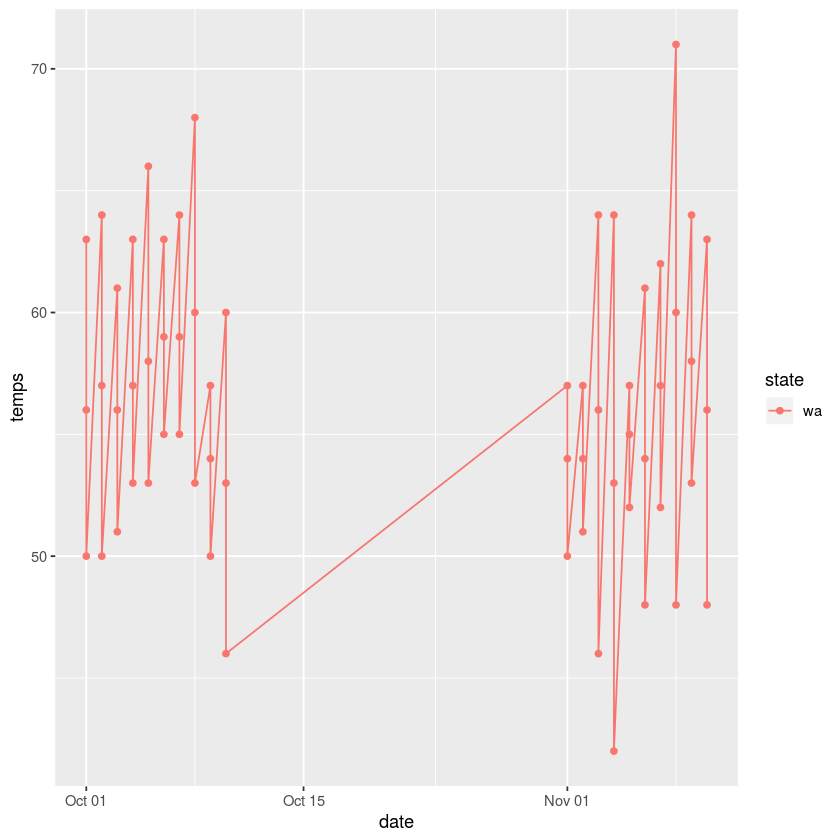

In [52]:
# Change the element column to a column for every
# unique value of this column
# Move the associated value in the value column 
# to the newly created column
# Column order should be tmax, tavg, tmin
# store the result in df5
# Hint: element and value columns are replaced by tmax, tavg, tmin
# Hint: spread() key = element
df5 <- df4 %>%  spread(key = element, value = value ) %>% 
   select(id, date, tmax, tavg, tmin)

# Split id into city and state columns
# city and state columns should be ordered first
# Store result in df6
# remove id column
# Hint: separate() col = id
df6 <- df5 %>% separate(id, c('city', 'state')) %>%
   select(state, city, date, tmax, tavg, tmin)

# glimpse result
df6 %>% glimpse()

# display first 6 rows of result
df6 %>% head(6)

# Plot all tmax, tavg, and tmin as y axis
# x axis is date
# data: df6
# point and line geometries plus color
# Hint: use gather() key = element
df6 %>% 
   gather(4:6, key = element, value = temps) %>% 
   ggplot(aes(date, temps , color = state)) +
      geom_point() +
      geom_line()

# Summary
The tidyverse contains a number of packages and functions that, when combined together, enable you to organize your data into tidy data. 